# Question 1

Given a _univariate_ (single-variable) _probability density function (PDF)_ $f(x)$, e.g.
$$
f(x) = \begin{cases}
0, & \text{if }x < -\frac{\pi}{2} \\
\frac 12\cos(x), & \text{if }-\frac{\pi}{2} < x < \frac{\pi}{2} \\
0, & \text{if }\frac{\pi}{2} < x
\end{cases}
$$
it's **mean** is
$$
E[x] = \int_{-\infty}^{\infty}xf(x)dx = \frac 12 \int_{-\pi/2}^{\pi/2}x\cos(x)dx,
$$
and its **variance** is
$$
E[x^2] = \int_{-\infty}^{\infty}x^2f(x)dx = \frac 12 \int_{-\pi/2}^{\pi/2}x^2\cos(x)dx.
$$

In [1]:
import sympy as sp

In [2]:
x = sp.Symbol('x')

Our pdf should integrate to $1$...

In [7]:
sp.integrate(0.5*sp.cos(x),(x,-sp.pi/2,sp.pi/2))

Mean:

In [8]:
sp.integrate(0.5*sp.cos(x)*x,(x,-sp.pi/2,sp.pi/2))

Variance:

In [10]:
float(sp.integrate(0.5*sp.cos(x)*x**2,(x,-sp.pi/2,sp.pi/2)))

Probability that $x$ is smaller than $-\frac 14$:

In [12]:
float(sp.integrate(0.5*sp.cos(x),(x,-sp.pi/2,-sp.pi/4)))

## Plotting the PDF $f(x)$

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
@np.vectorize
def np_f(x):
    return (-np.pi/2<x<np.pi/2)*0.5*np.cos(x)

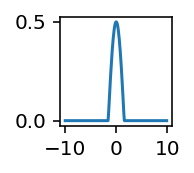

In [6]:
xdata = np.arange(-10,10,0.1)
ydata = np_f(xdata)

plt.figure(dpi=144, figsize=(1,1))
plt.plot(xdata,ydata)
plt.show()

# Question 2
First, we need to read in the data.

In [14]:
import pandas as pd

In [45]:
df = pd.read_csv('homes.csv', sep='\s+')
values = np.array(df['Value'])
numbers = np.array(df['Number'])

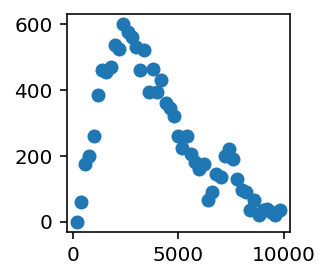

In [46]:
plt.figure(dpi=144, figsize=(2,2))
plt.scatter(values, numbers)
plt.show()

Our pdf should integrate to $1$...

In [47]:
pdf = numbers/numbers.sum()
sum(pdf)

Mean:

In [48]:
np.sum(values*pdf)

How many claims with the value above £5000 can be expected during the next year?

$$(\text{probability of value above £}5000)\times(\text{average number of claims a year})$$

In [52]:
np.sum(pdf*(values>5000))*numbers.sum()/5

## Small Example 

In [41]:
x = np.array([100,]*10000+[200,]*10)
print(len(x))
x.mean()

10010


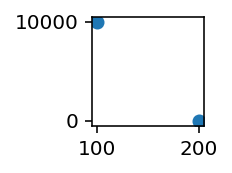

In [44]:
x = np.array([100,200])
y = np.array([10000,10])
plt.figure(dpi=144, figsize=(1,1))
plt.scatter(x, y)
plt.show()
pdf = y/y.sum()
np.sum(x*pdf)